In [9]:
import pandas as pd


plain = pd.read_csv("results/plain.csv")
native = pd.read_csv("results/opt3.csv")
invsum = pd.read_csv("results/invsum.csv")
ur2 = pd.read_csv("results/unroll2.csv")
ur4 = pd.read_csv("results/unroll4.csv")
fm = pd.read_csv("results/fastmath.csv")

df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["native"] = native["time"] * 1e6
df["no-deps"] = invsum["time"] * 1e6
df["unroll2"] = ur2["time"] * 1e6
df["unroll4"] = ur4["time"] * 1e6
df["fast-math"] = fm["time"] * 1e6
df

,elements,plain,native,no-deps,unroll2,unroll4,fast-math
0,128,6.53934,5.97578,6.08652,6.01662,6.19252,6.44678
1,256,8.19368,8.01244,7.69394,7.36806,7.56728,6.39900
2,512,11.48990,10.33300,10.50920,10.37910,9.92114,7.63282
3,1024,18.03600,16.52020,16.40650,15.48630,16.71890,10.34640
4,2048,31.03040,26.40680,27.50560,25.09630,25.61980,16.61910
5,4096,58.79150,48.06740,52.29540,47.29220,46.44780,23.15510
6,8192,112.55700,92.22410,95.97900,88.71280,89.14720,37.24960
7,16384,220.21600,183.02100,183.04100,177.22500,173.79500,70.26050


In [2]:
# df["native_su"] = df["plain"] / df["native"]
# print(df.to_latex(header=True, index=False, float_format="%.4f"))
# df

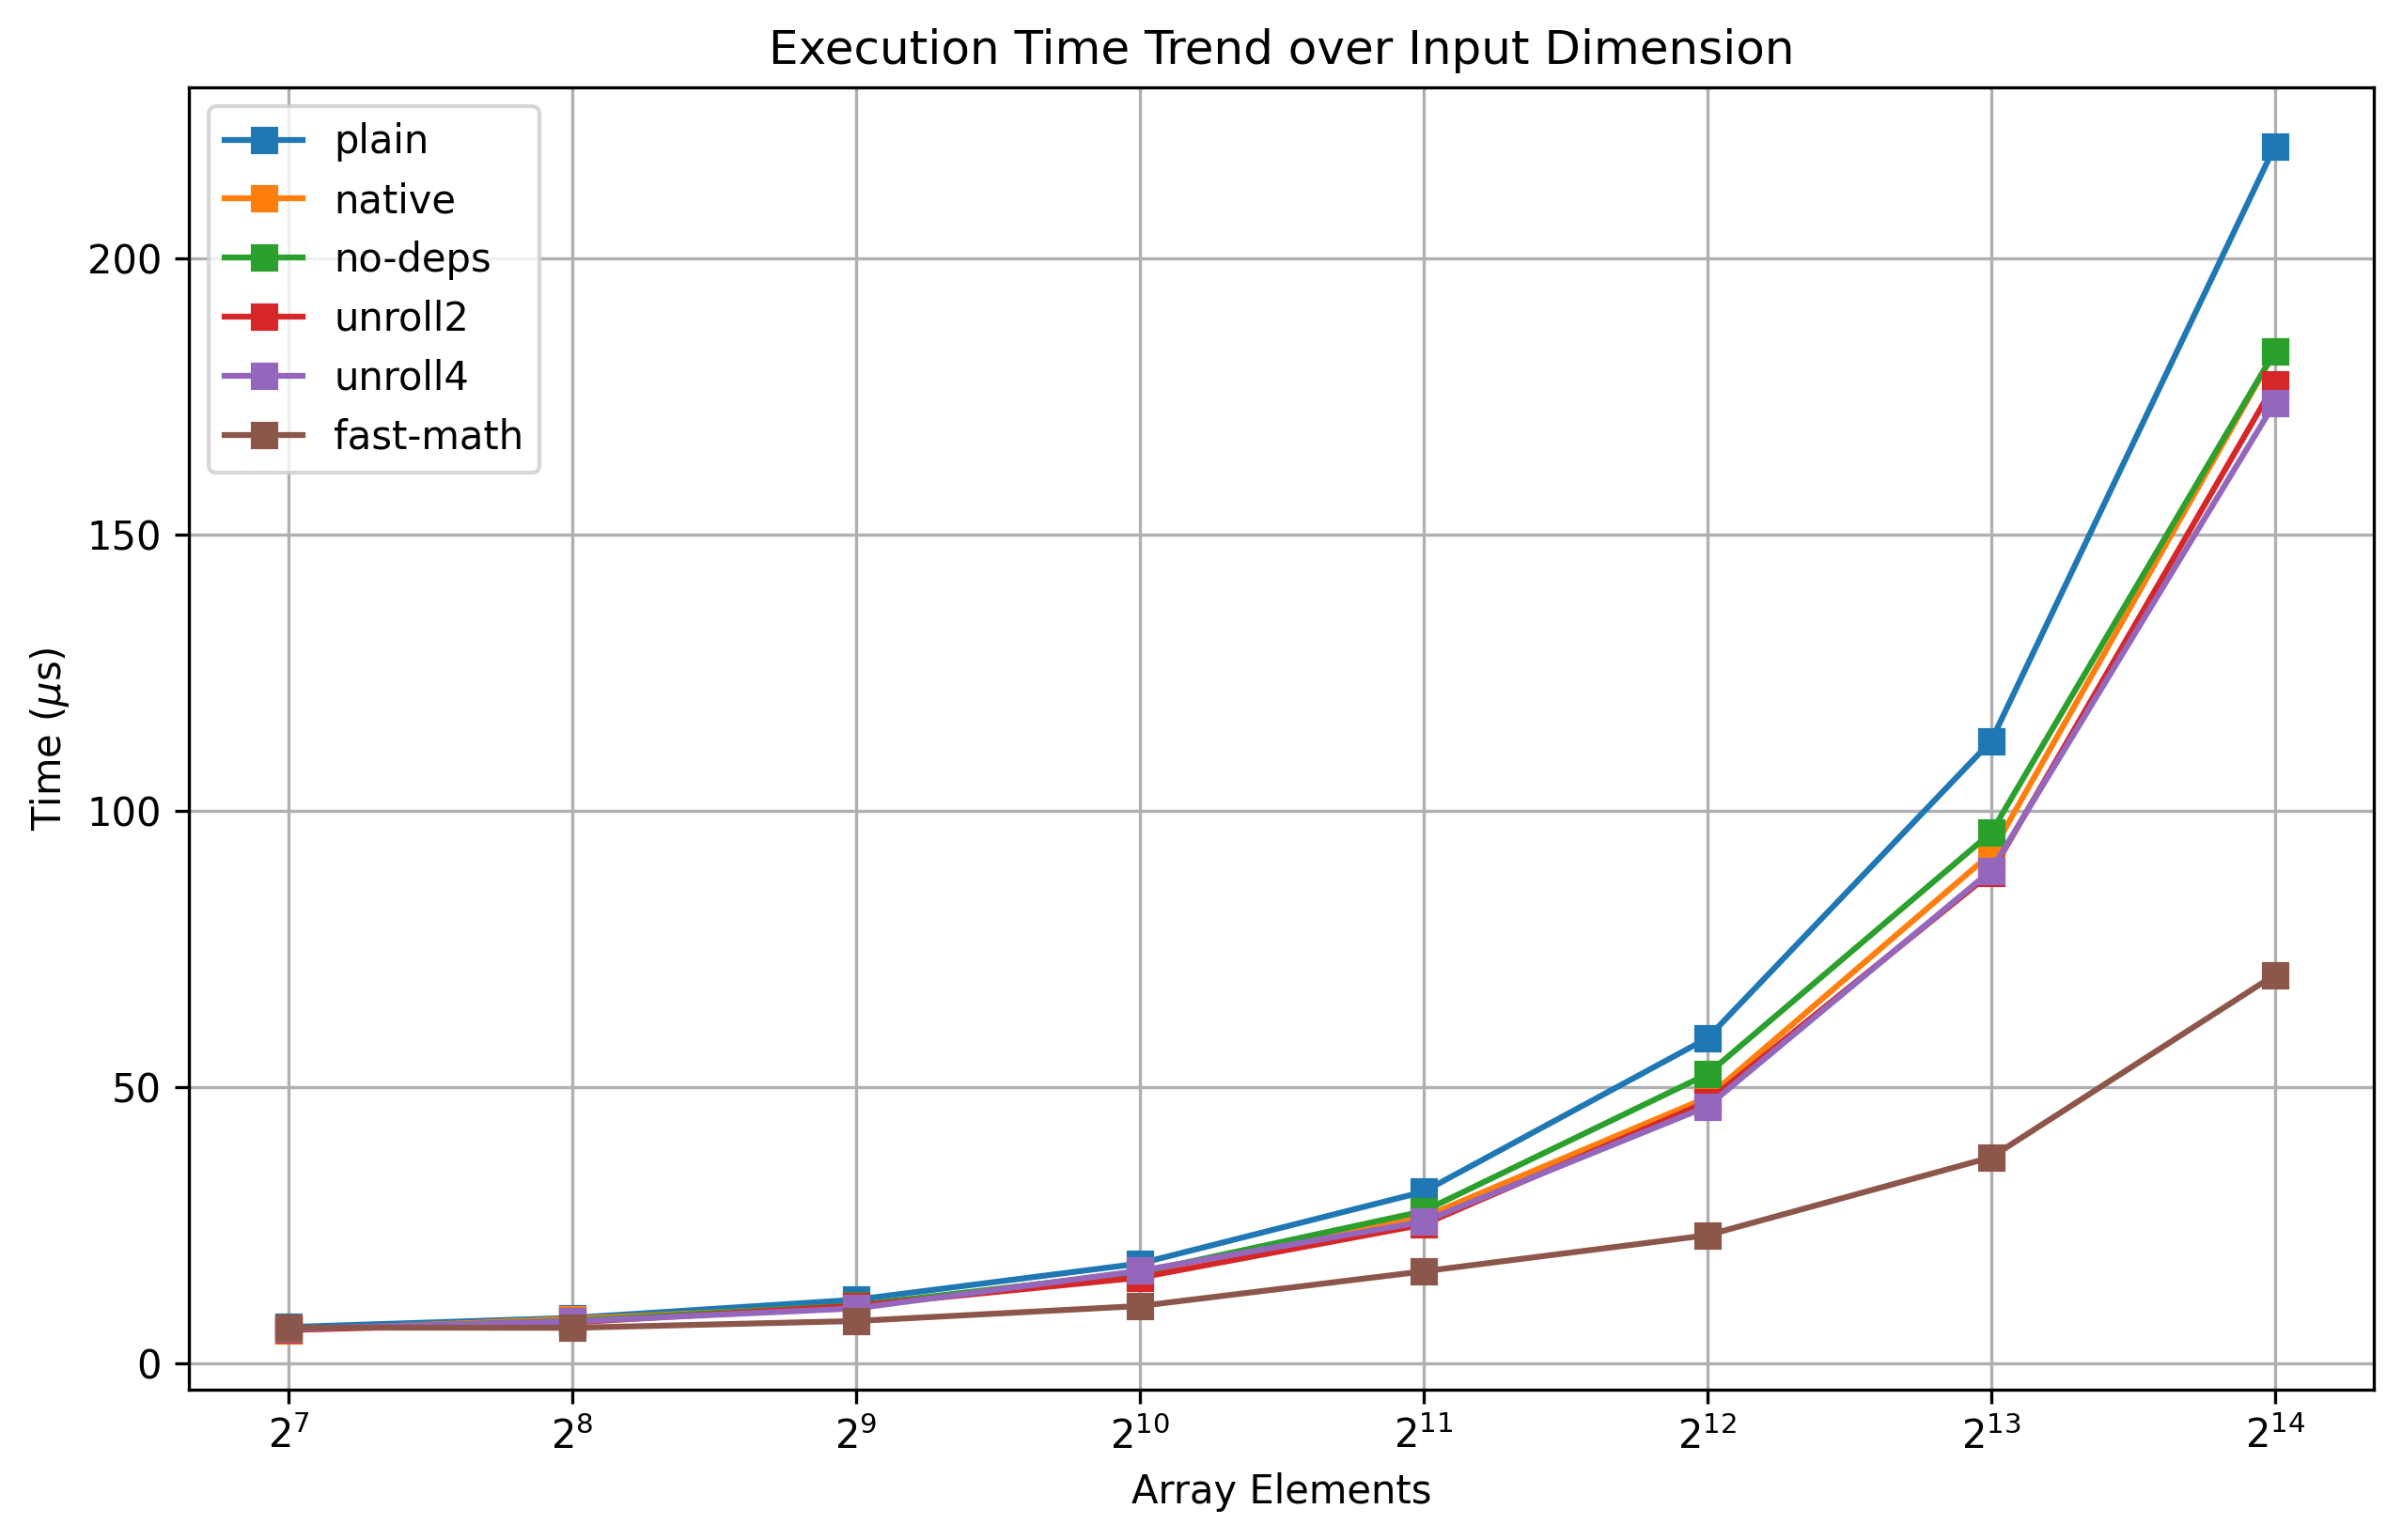

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")

labels = [c for c in df.columns if c != "elements"]
for label in labels:
    plt.plot(df["elements"], df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel(r"Time ($\mu$s)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [4]:
speedup_df = df.copy()
for c in speedup_df.columns:
    if c != "elements":
        speedup_df[c] = df["plain"] / df[c]

speedup_df

,elements,plain,native,invsum,ur2,ur4,fm
0,128,1.0,1.094307,1.074397,1.086879,1.056006,1.014358
1,256,1.0,1.022620,1.064952,1.112054,1.082777,1.280463
2,512,1.0,1.111962,1.093318,1.107023,1.158123,1.505328
3,1024,1.0,1.091754,1.099320,1.164642,1.078779,1.743215
4,2048,1.0,1.175091,1.128148,1.236453,1.211188,1.867153
5,4096,1.0,1.223105,1.124219,1.243154,1.265754,2.539030
6,8192,1.0,1.220473,1.172725,1.268780,1.262597,3.021697
7,16384,1.0,1.203228,1.203097,1.242579,1.267102,3.134279


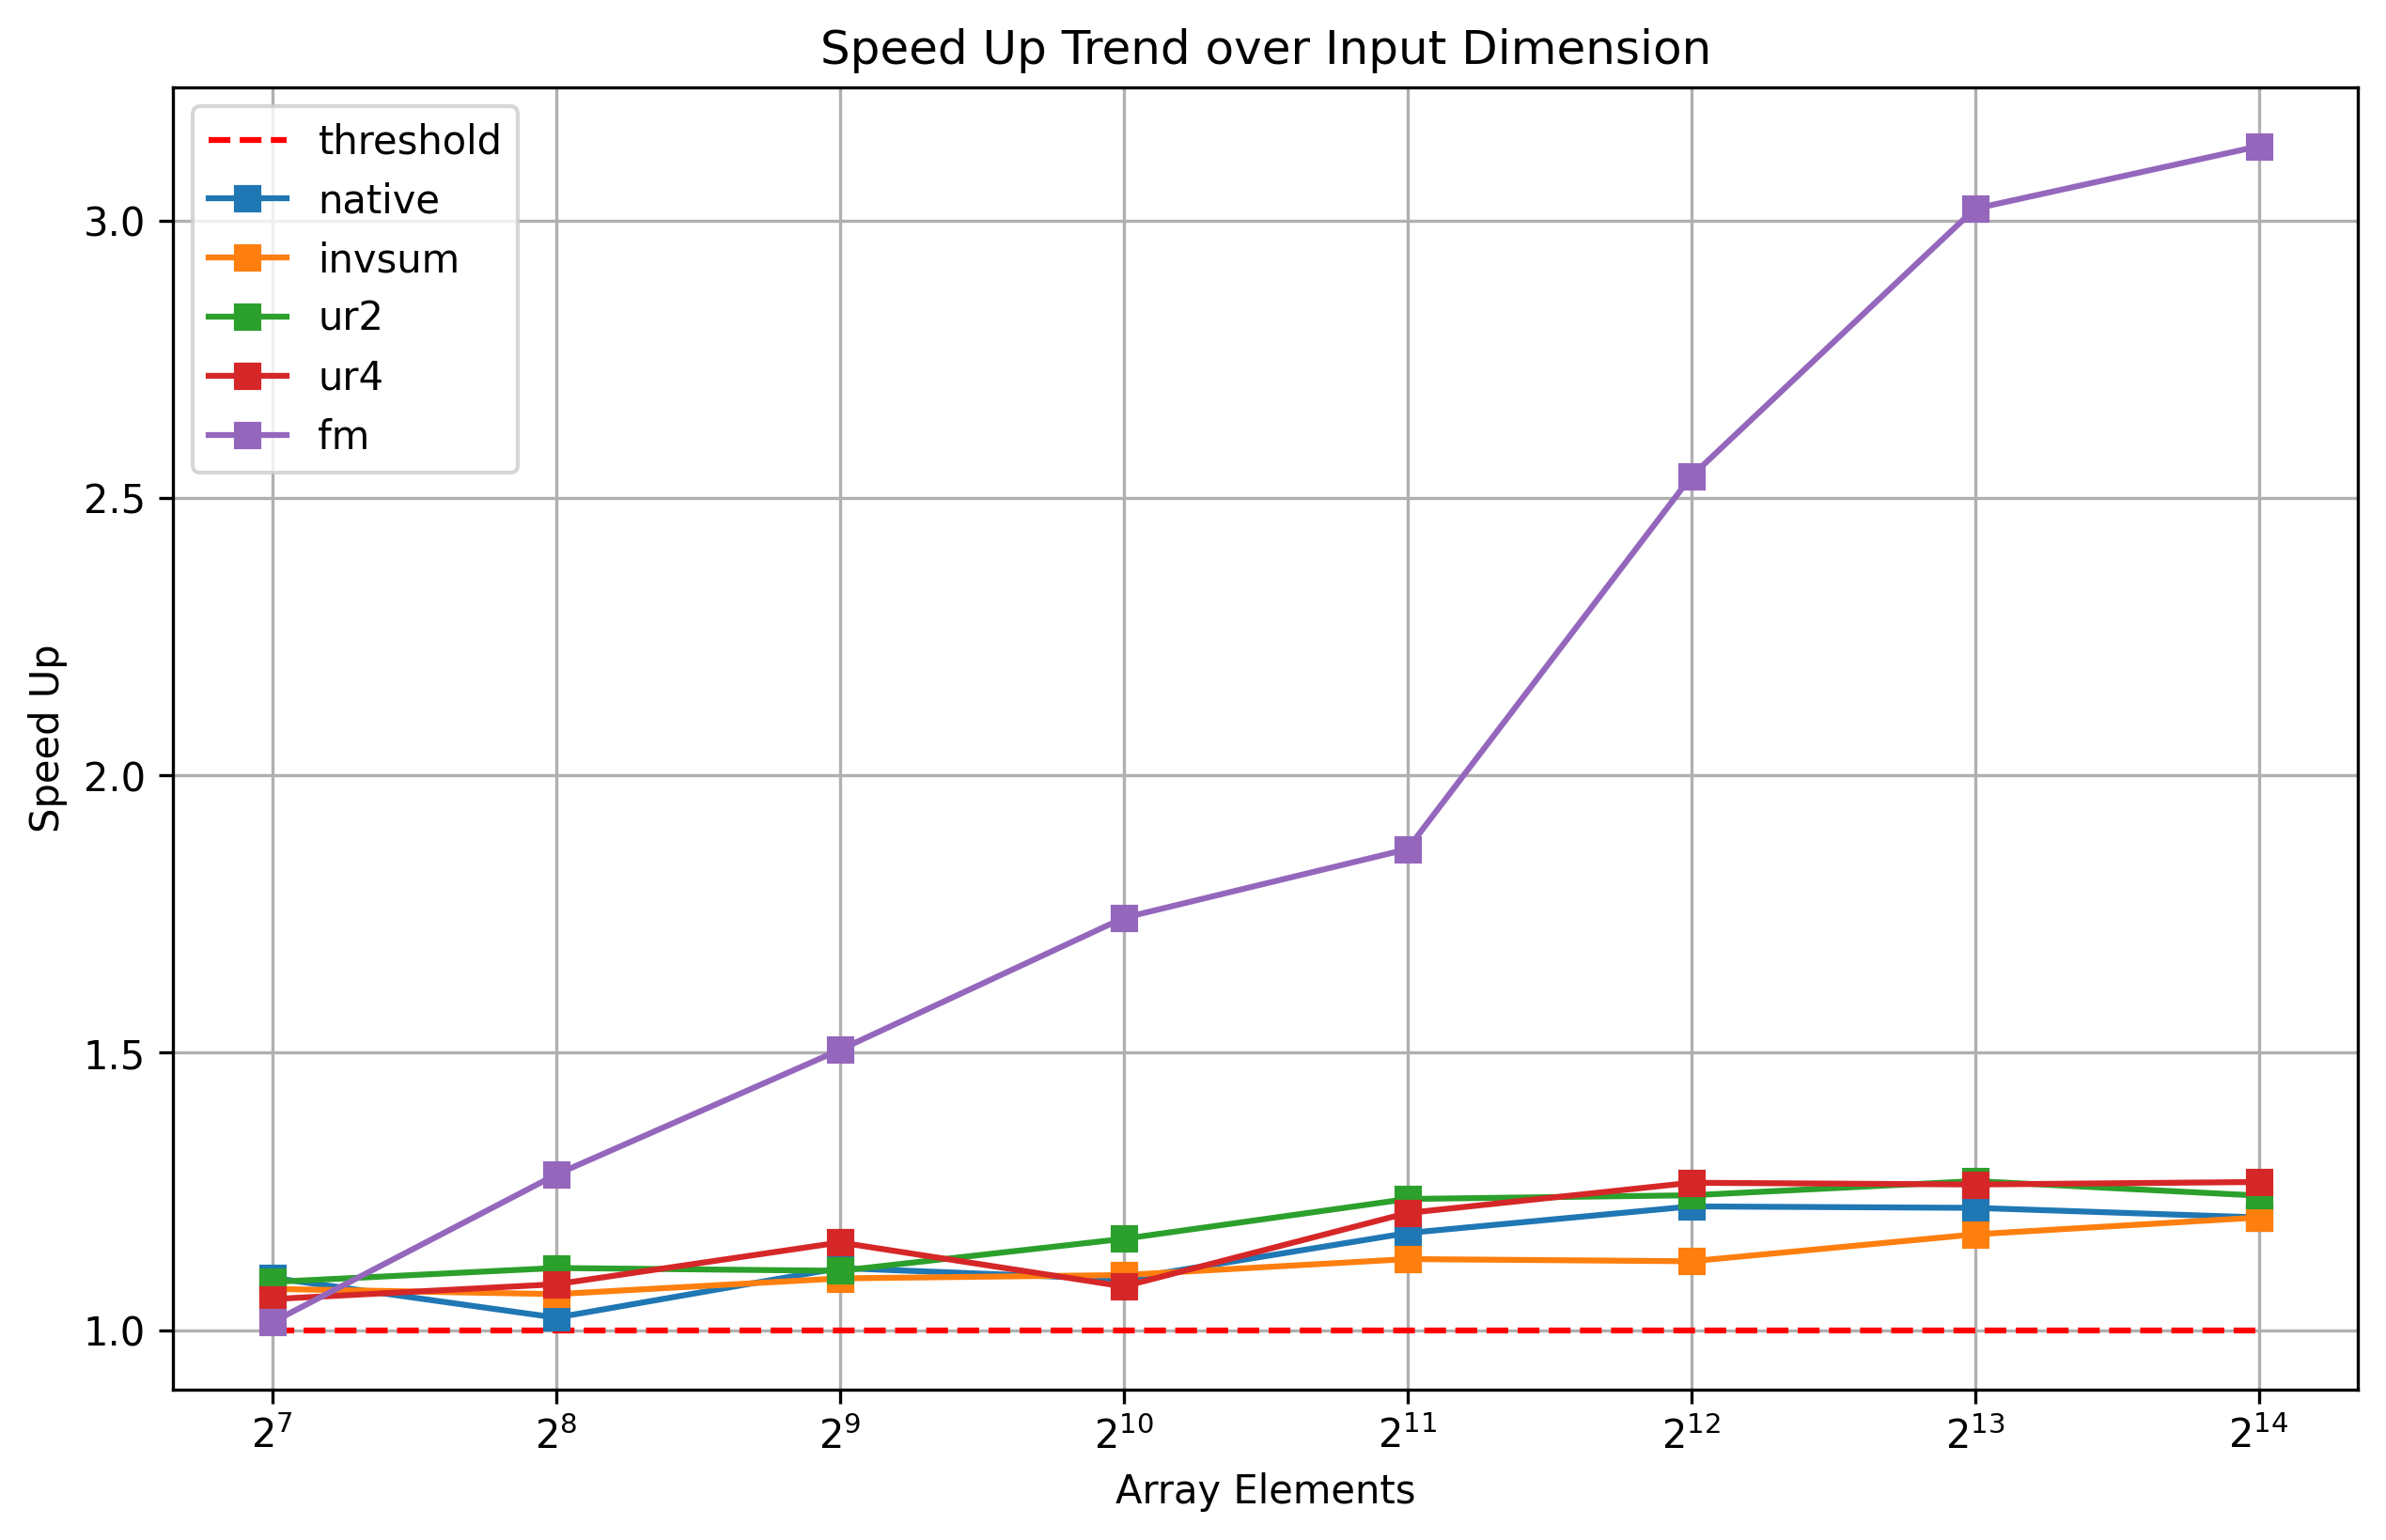

In [6]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up Trend over Input Dimension")

# threshold of good speed up
plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

for label in labels:
    if label != "plain":
        plt.plot(speedup_df["elements"], speedup_df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel("Speed Up")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()